In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [177]:
#evaluation
def evaluation(dataframe):

    true_labels = dataframe['label']
    predicted_labels = dataframe['model_prediction']

    accuracy = round(accuracy_score(true_labels, predicted_labels),4)
    f1 = round(f1_score(true_labels, predicted_labels, average = "macro"),4)
    precision = round(precision_score(true_labels, predicted_labels),4)
    recall = round(recall_score(true_labels, predicted_labels),4)

    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    return f1

In [269]:
#evaluation
def evaluation_weighted(dataframe):

    true_labels = dataframe['label']
    predicted_labels = dataframe['model_prediction']

    accuracy = round(accuracy_score(true_labels, predicted_labels),4)
    f1 = round(f1_score(true_labels, predicted_labels, average = "weighted"),4)
    precision = round(precision_score(true_labels, predicted_labels),4)
    recall = round(recall_score(true_labels, predicted_labels),4)

    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    return f1

In [332]:
def evaluation_grouped(dataframe):

    #evaluation grouped by subject
    true_labels = dataframe['label']
    predicted_labels = dataframe['model_prediction']
    # Group the DataFrame by a specific column (e.g., 'subject')
    grouped_df = dataframe.groupby('subject')

    # Calculate accuracy and F1 score for each group
    accuracy_scores = grouped_df.apply(lambda x: round(accuracy_score(x['label'], x['model_prediction']),4))
    f1_scores = grouped_df.apply(lambda x: f1_score(x['label'], x['model_prediction']))
    precision_scores = grouped_df.apply(lambda x: precision_score(x['label'], x['model_prediction']))
    recall_scores = grouped_df.apply(lambda x: recall_score(x['label'], x['model_prediction']))

    # Print the accuracy and F1 score for each group
    for group, accuracy, f1, precision, recall in zip(grouped_df.groups.keys(), accuracy_scores, f1_scores, precision_scores, recall_scores):
        print(f"Group: {group}")
        print(f"Accuracy: {accuracy}")
        #print(f"F1 Score: {f1}")
    return accuracy_scores

In [331]:
def evaluation_grouped_length(dataframe):

    #evaluation grouped by subject
    true_labels = dataframe['label']
    predicted_labels = dataframe['model_prediction']
    # Group the DataFrame by a specific column (e.g., 'subject')
    grouped_df = dataframe.groupby('text_bins')

    # Calculate accuracy and F1 score for each group
    accuracy_scores = grouped_df.apply(lambda x: accuracy_score(x['label'], x['model_prediction']))
    f1_scores = grouped_df.apply(lambda x: f1_score(x['label'], x['model_prediction'], average = "macro"))
    precision_scores = grouped_df.apply(lambda x: precision_score(x['label'], x['model_prediction']))
    recall_scores = grouped_df.apply(lambda x: recall_score(x['label'], x['model_prediction']))

    # Print the accuracy and F1 score for each group
    for group, accuracy, f1, precision, recall in zip(grouped_df.groups.keys(), accuracy_scores, f1_scores, precision_scores, recall_scores):
        print(f"Group: {group}")
        print(f"Accuracy: {round(accuracy,4)}")
        print(f"F1 Score: {round(f1,4)}")
        print(f"Precision: {round(precision,4)}")
        print(f"Recall: {round(recall,4)}")

# Plots

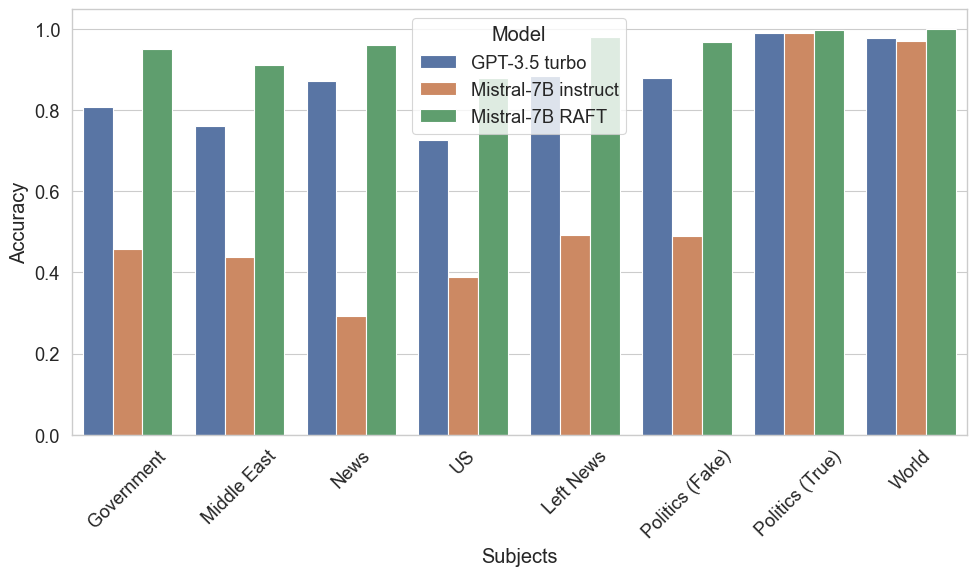

In [429]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Results for each model on each dataset

labels = ['Government', 'Middle East', 'News', 'US', 'Left News','Politics (Fake)','Politics (True)','World']

# Create a DataFrame
df = pd.DataFrame({
    'Labels': labels,
    'GPT-3.5 turbo': gpt_grouped,
    'Mistral-7B instruct': mistral_grouped,
    'Mistral-7B RAFT': raft_grouped
})

# Melt the DataFrame to make it suitable for Seaborn
df_melted = df.melt(id_vars='Labels', var_name='Model', value_name='Accuracy')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x='Labels', y='Accuracy', hue='Model', data=df_melted)
# Set the font scale
sns.set_context("paper", font_scale=1.5)
# Angle the x-axis labels
plt.xticks(rotation=45)
plt.xlabel('Subjects')
plt.tight_layout()
plt.savefig("barplot_subjects.png")
plt.show()

In [300]:
# Define the bin ranges
bins = [0, 50, 150, 300, 550, 850, float('inf')]
# Define the bin labels
labels = ['very short', 'short', 'medium', 'average', 'long', 'very long']
# Group the texts into bins based on the 'text_length' column
raft_isot['text_bins'] = pd.cut(raft_isot['text_length'], bins=bins, labels=labels)

In [302]:
raft_isot["text_bins"].value_counts()

text_bins
average       3376
long          1953
very long     1196
medium        1124
short         1117
very short     214
Name: count, dtype: int64

In [321]:
bins = raft_isot.groupby("text_bins")

In [324]:
print(bins.label.value_counts())

text_bins   label
very short  0         211
            1           3
short       1         845
            0         272
medium      1         584
            0         540
average     0        1927
            1        1449
long        0        1159
            1         794
very long   1         632
            0         564
Name: count, dtype: int64


In [306]:
evaluation_grouped_length(raft_isot)

Group: very short
Accuracy: 0.9953
F1 Score: 0.9274
Precision: 0.75
Recall: 1.0
Group: short
Accuracy: 0.9866
F1 Score: 0.9815
Precision: 0.9837
Recall: 0.9988
Group: medium
Accuracy: 0.9769
F1 Score: 0.9768
Precision: 0.9589
Recall: 0.9983
Group: average
Accuracy: 0.9763
F1 Score: 0.976
Precision: 0.9489
Recall: 0.9986
Group: long
Accuracy: 0.9749
F1 Score: 0.9742
Precision: 0.9419
Recall: 1.0
Group: very long
Accuracy: 0.9816
F1 Score: 0.9815
Precision: 0.9707
Recall: 0.9953


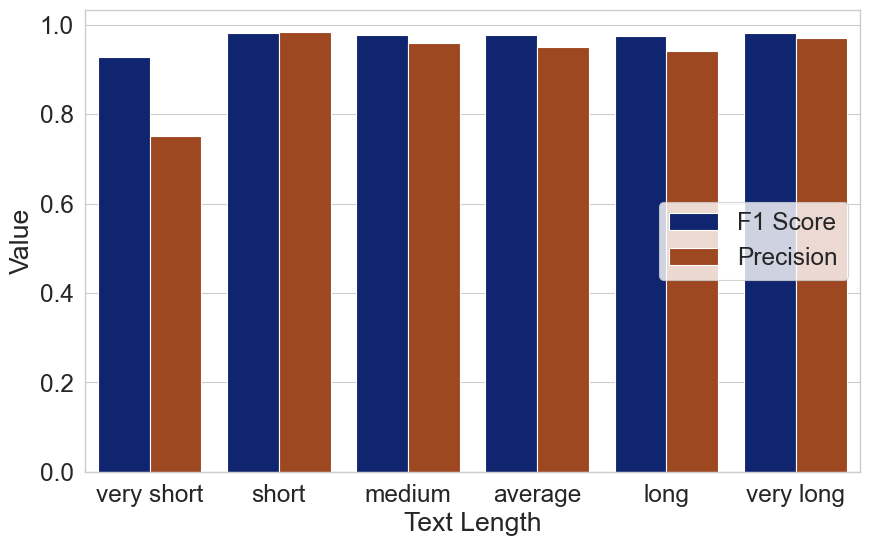

In [442]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame
data = {
    'Text Length': ['very short', 'short', 'medium', 'average', 'long', 'very long'],
    'F1 Score': [0.9274, 0.9815, 0.9768, 0.976, 0.9742, 0.9815],
    'Precision': [0.75, 0.9837, 0.9589, 0.9489, 0.9419, 0.9707]
}

df = pd.DataFrame(data)

# Reshape the DataFrame to a long format
df_melted = df.melt(id_vars='Text Length', var_name='Metric', value_name='Value')

# Plot
plt.figure(figsize=(10, 6))
# Move the legend to the right si
sns.barplot(x='Text Length', y='Value', hue='Metric', data=df_melted, palette='dark')
# Set the font scale
sns.set_context("paper", font_scale=2)
# Explicitly adding the legend to the plot
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# Move the legend inside the plot on the right side
plt.legend(loc='center right')
plt.savefig("barplot_text_length.png")
plt.show()

In [163]:
# RAFT: number of "inconclusive" decisions = 241
raft_incon.model_prediction.value_counts()

model_prediction
0    906
I    241
1    120
Name: count, dtype: int64

In [164]:
filtered =raft_incon[raft_incon['model_prediction'] != "I"]

In [165]:
filtered['model_prediction'] = filtered['model_prediction'].astype(int)

/var/folders/kz/t95lq08100568zsb6m5_klhr0000gn/T/ipykernel_46934/4032000996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['model_prediction'] = filtered['model_prediction'].astype(int)


In [166]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1026 entries, 0 to 1266
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0.1        1026 non-null   int64 
 1   Unnamed: 0          1026 non-null   int64 
 2   id                  1026 non-null   object
 3   text                1026 non-null   object
 4   subject             1026 non-null   object
 5   context             1015 non-null   object
 6   prompt              1026 non-null   object
 7   label               1026 non-null   int64 
 8   model_prediction    1026 non-null   int64 
 9   raw_model_response  1026 non-null   object
dtypes: int64(4), object(6)
memory usage: 88.2+ KB


In [167]:
evaluation(filtered)

Accuracy: 0.5029
F1 Score: 0.4424
Precision: 0.7417
Recall: 0.1567


(0.5029, 0.4424, 0.7417, 0.1567)

In [135]:
def f3_evaluation_grouped(dataframe):

    #evaluation grouped by subject
    true_labels = dataframe['label']
    predicted_labels = dataframe['model_prediction']
    # Group the DataFrame by a specific column (e.g., 'subject')
    grouped_df = dataframe.groupby('dataset_source')

    # Calculate accuracy and F1 score for each group
    accuracy_scores = grouped_df.apply(lambda x: accuracy_score(x['label'], x['model_prediction']))
    f1_scores = grouped_df.apply(lambda x: f1_score(x['label'], x['model_prediction']))
    precision_scores = grouped_df.apply(lambda x: precision_score(x['label'], x['model_prediction']))
    recall_scores = grouped_df.apply(lambda x: recall_score(x['label'], x['model_prediction']))

    # Print the accuracy and F1 score for each group
    for group, accuracy, f1, precision, recall in zip(grouped_df.groups.keys(), accuracy_scores, f1_scores, precision_scores, recall_scores):
        print(f"Group: {group}")
        print(f"Accuracy: {accuracy}")
        print(f"F1 Score: {f1}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")

# Plot results

In [206]:
print(results_gpt)
print(results_mistral)
print(results_raft)

[0.9209, 0.566, 0.5507, 0.6141, 0.5352]
[0.6591, 0.6654, 0.563, 0.5594, 0.5457]
[0.9785, 0.6055, 0.5669, 0.6537, 0.3618]


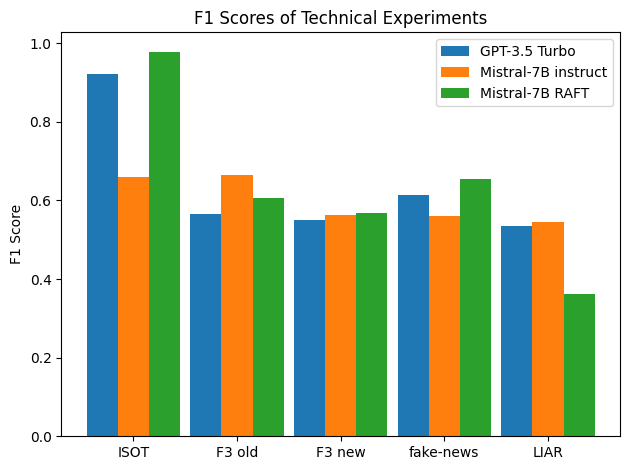

In [208]:
import matplotlib.pyplot as plt
import numpy as np

# Results for each model on each dataset
results_gpt
results_mistral
results_raft

labels = ['ISOT', 'F3 old', 'F3 new', 'fake-news', 'LIAR']

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, results_gpt, width, label='GPT-3.5 Turbo')
rects2 = ax.bar(x, results_mistral, width, label='Mistral-7B instruct')
rects3 = ax.bar(x + width, results_raft, width, label='Mistral-7B RAFT')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores of Technical Experiments')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


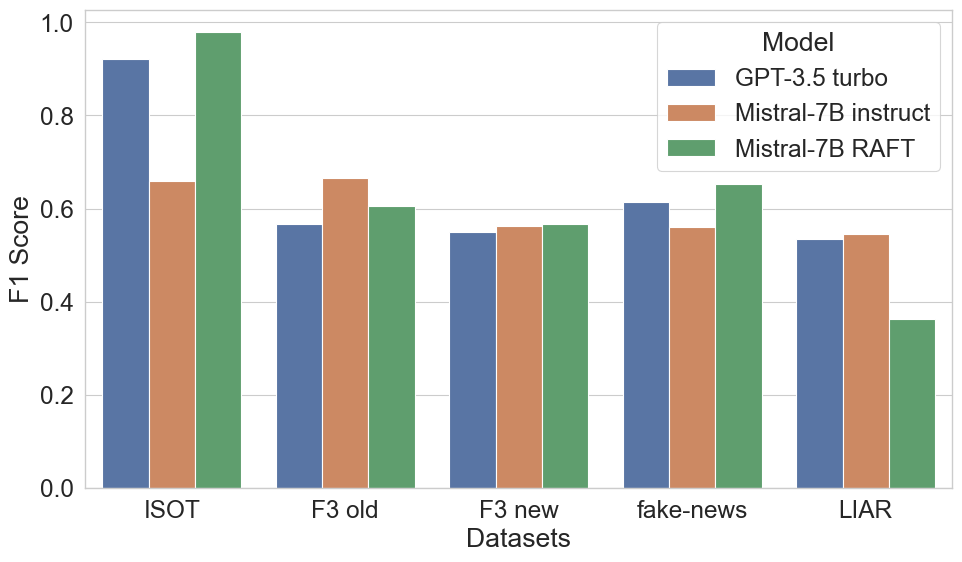

In [426]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Results for each model on each dataset




labels = ['ISOT', 'F3 old', 'F3 new', 'fake-news', 'LIAR']

# Create a DataFrame
df = pd.DataFrame({
    'Labels': labels,
    'GPT-3.5 turbo': results_gpt[:5],
    'Mistral-7B instruct': results_mistral[:5],
    'Mistral-7B RAFT': results_raft[:5]
})

# Melt the DataFrame to make it suitable for Seaborn
df_melted = df.melt(id_vars='Labels', var_name='Model', value_name='F1 Score')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x='Labels', y='F1 Score', hue='Model', data=df_melted)
sns.set_context("paper", font_scale=2)
# Angle the x-axis labels
#plt.xticks(rotation=45)
plt.xlabel('Datasets')
plt.tight_layout()
plt.savefig("barplot_results.png")
plt.show()

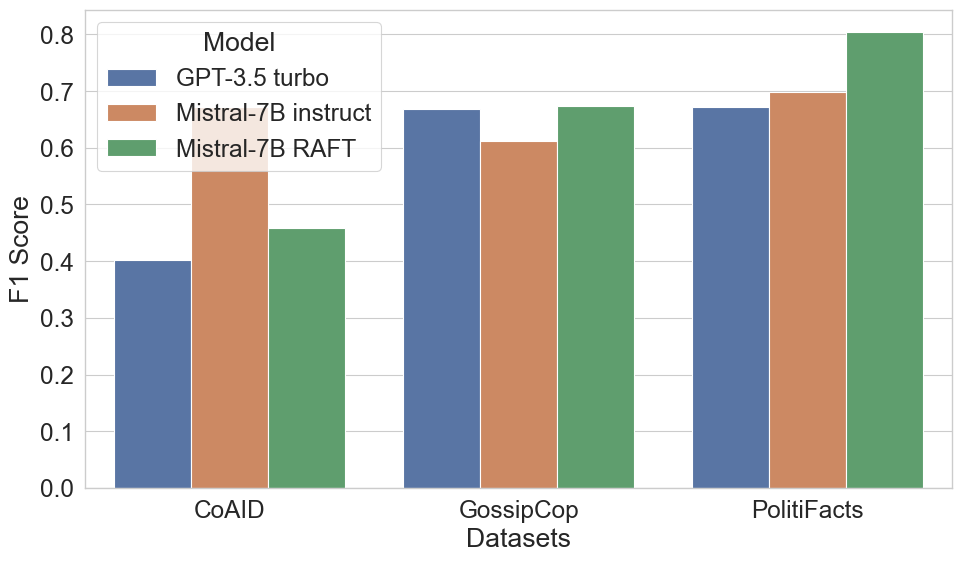

In [432]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Results for each model on each dataset

labels = ['CoAID','GossipCop','PolitiFacts']

# Create a DataFrame
df = pd.DataFrame({
    'Labels': labels,
    'GPT-3.5 turbo': [0.4027, 0.6691, 0.6727],
    'Mistral-7B instruct': [0.6714, 0.612, 0.699],
    'Mistral-7B RAFT': [0.4591, 0.6729, 0.8036]
})

# Melt the DataFrame to make it suitable for Seaborn
df_melted = df.melt(id_vars='Labels', var_name='Model', value_name='F1 Score')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x='Labels', y='F1 Score', hue='Model', data=df_melted)
# Set the font scale
sns.set_context("paper", font_scale=2)
plt.xlabel('Datasets')
plt.tight_layout()
plt.savefig("barplot_f3old_grouped.png")
plt.show()